# Lecture 5 (Saturday)

### How many degrees of freedom does your data have? Your model have? This helps define flexibility

- DOF: The number of coefficients the model has (including the constant)
- More DOF more flexibility (isn't necessarily a good thing)
- DOF Residuals (Error) = Total # Datapoints - DOF Model

ie you have a model with 20,000 dataponts and 20 features:
- DOF Model: 21
- DOF Residuals = 20,000 - 21 = 19979

### R Squared

- helps define correlation between variables
- generalization of a correlation between more than just 2 variables
- generalized for multi-dimension


- in only one y and one x: it becomes the pearson correlation squared
- between 0 and 1

#### What's the difference between standard error and standard deviation?
#### What is a student's T?
- Gausse tried to apply normal distribution to the guiness sales issues & it didn't work
- He invented the student's T distribution and it fixed his confidence intervals


##### Student T's distribution:
    - Use it when you have a small sample size (instead of normal)
    - (# Data)/(# Parameters) >= 5 can use Student's T
    - (# Data)/(# Parameters) >= 30 can use Normal Distribution

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
auto = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 4\Auto.csv",
                  encoding='utf-8', na_values=['?'], na_filter=True)
auto = auto.dropna()

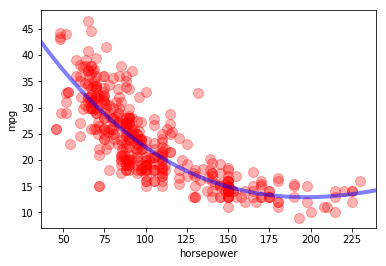

In [3]:
sns.regplot(x='horsepower', y='mpg', data=auto, ci=False,
           scatter_kws={'color':'r', 'alpha':0.3, 's':100},
           line_kws={'color':'b', 'alpha':0.5, 'lw':4},
           marker="o", order=3)

In [4]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
loo = LeaveOneOut()
loo.get_n_splits(auto)

392

In [5]:
X = auto[['horsepower', 'displacement', 'acceleration', 'weight']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression()
    lr = lr.fit(X[train_i], y[train_i])
    rss[i] = (lr.predict(X[test_i]) - y[test_i])**2
    i += 1
np.sum(rss)

7189.117742257378

## Iteratively find best feature combinations for this model:

In [6]:
from itertools import combinations

In [7]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
max_val = 100_000_000
for L in range(1, len(features)+1):
    print(L, "/", len(features))
    for i in combinations(features, L):
        
        X = auto[list(i)].values
        y = auto['mpg'].values
        rss = np.zeros(auto.shape[0])
        counter = 0
        for train_i, test_i in loo.split(auto):
            lr = LinearRegression()
            lr = lr.fit(X[train_i], y[train_i])
            rss[counter] = (lr.predict(X[test_i]) - y[test_i])**2
            counter += 1
            
        val = np.sum(rss)
        if val < max_val:
            max_val = val
            best_features = list(i)

print("Best features for application: ", best_features, max_val)

1 / 7
2 / 7
3 / 7
4 / 7
5 / 7
6 / 7
7 / 7
Best features for application:  ['cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin'] 4424.80567638019


## Machine learning developers need to run standard deviation of errors for confidence intervals when cross-validating

ERROR = CVE +/- 1.96*SDcve/(sqrt(# iterations))

## Get errors for each train/test split of the data to get a distribution of (squared) model error:

In [34]:
from sklearn.model_selection import KFold
X = auto[['horsepower', 'displacement']].values

variance_of_error = []
min_k = 5
max_k = 30

for k in range(min_k, max_k+1):
    rss = np.zeros(k)
    kf = KFold(n_splits=k, shuffle=True)
    i = 0
    for train_i, test_i, in kf.split(auto):
        lr = LinearRegression()
        lr = lr.fit(X[train_i], y[train_i])
        rss[i]=np.sum((lr.predict(X[test_i]) - y[test_i])**2)
        i+=1
    variance_of_error.append(np.sum(rss)/len(X))
    
mean_variance_of_error = np.mean(variance_of_error)
SD = np.std(variance_of_error)
num_k_iterations = max_k-min_k+1

print('mean_variance_of_error', "+/-", '1.96', "*", 'SD', '/ sqrt(#iterations through k)')
print(mean_variance_of_error, "+/-", 1.96*SD/((num_k_iterations)**0.5))
# print('\n')
# print(variance_of_error)

mean_variance_of_error +/- 1.96 * SD / sqrt(#iterations through k)
20.78566667408527 +/- 0.040173242831570866


# Credit Dataset

In [45]:
credit = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 4\Credit.csv", 
                 encoding='utf-8', index_col=0)
credit['Married'] = [1.0 if x=='Yes' else 0 for x in credit['Married']]
credit['Student'] = [1.0 if x=='Yes' else 0 for x in credit['Student']]
credit['Male'] = [1.0 if x.strip()=='Male' else 0 for x in credit['Gender']]

credit = credit[['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]

In [46]:
credit.head()

,Balance,Income,Limit,Rating,Cards,Age,Education
1,333,14.891,3606,283,2,34,11
2,903,106.025,6645,483,3,82,15
3,580,104.593,7075,514,4,71,11
4,964,148.924,9504,681,3,36,11
5,331,55.882,4897,357,2,68,16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213401CB630>,
      dtype=object)

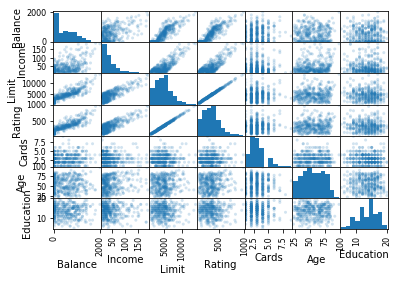

In [47]:
scatter_matrix(credit, alpha=0.2)

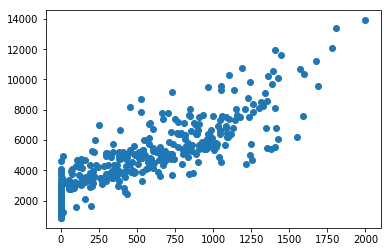

In [51]:
plt.scatter(credit['Balance'], credit['Limit'])

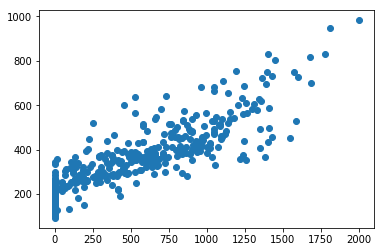

In [52]:
plt.scatter(credit['Balance'], credit['Rating'])

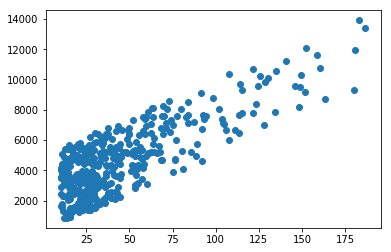

In [54]:
plt.scatter(credit['Income'], credit['Limit'])

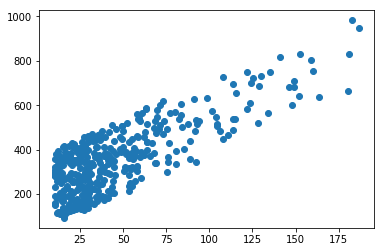

In [55]:
plt.scatter(credit['Income'], credit['Rating'])

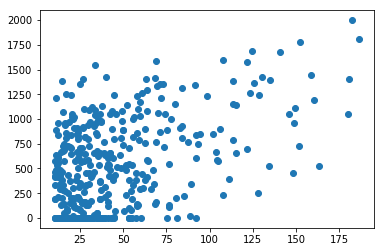

In [56]:
plt.scatter(credit['Income'], credit['Balance'])

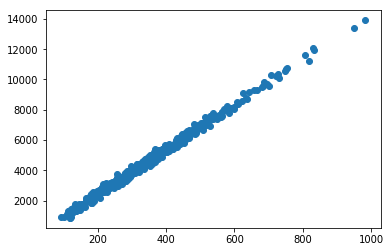

In [57]:
plt.scatter(credit['Rating'], credit['Limit'])

### If the p-value is above 0.05 then reject the feature

- Page 67 (81) in the textbook

#### Inter-correlated X features cause problems for us

# Lets do Ridge Regression...

#### Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf

In [75]:
from sklearn.linear_model import Ridge
y = credit['Balance'].values
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']].values
rr = Ridge(alpha=10, normalize=True)
rr.fit(X, y)

X_pred = np.array([15,3000,300,2,34,16]).reshape(1,6)
rr.predict(X_pred)

array([470.29152896])

#### We don't regularize Bo, but we do for all coefficients on all our features (just not the constant)

## Ridge Generated Cross-Validation

In [86]:
from sklearn.linear_model import RidgeCV
alpha_values = np.linspace(0.0001, 0.01, num=100)
rrcv = RidgeCV(alphas=alpha_values, normalize=True, store_cv_values=True)
rrcv.fit(X,y)

RidgeCV(alphas=array([0.0001, 0.0002, ..., 0.0099, 0.01  ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=True)

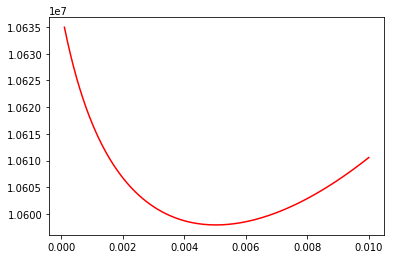

In [87]:
cv_values = np.sum(rrcv.cv_values_, axis=0)
plt.plot(alpha_values, cv_values, 'r')

Ridge Regression, Lasso, etc... are techniques of training a linear model that involve including regularization. These methods only appear in multi-variable linear models because that's the only time you are worried about colinearity. So we say we are using (for example) Ridge Regression instead of Least-Squares for training my linear model (by default a line of best fit uses least-squares to fit)

# Principal Component Analysis

In [88]:
auto = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 4\Auto.csv",
                  encoding='utf-8', na_values=['?'], na_filter=True)
auto = auto.dropna()

In [89]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto['mpg']

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.values)
Z = pca.transform(X)

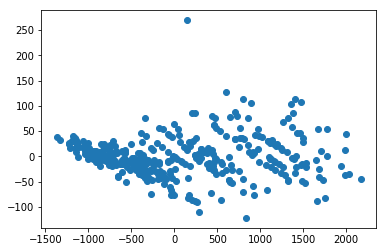

In [91]:
plt.scatter(Z[:, 0], Z[:, 1])